<a href="https://colab.research.google.com/github/huyhoang1996vn/my-ml/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

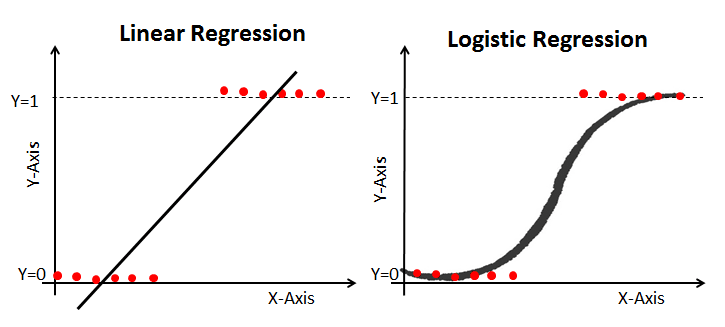

In [2]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima_df = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [3]:
# Remove the first row which contains non-numeric header information
pima_df = pima_df.iloc[1:]
# # Convert all columns to numeric, coercing errors to NaN
for col in pima_df.columns:
    pima_df[col] = pd.to_numeric(pima_df[col], errors='coerce')

In [4]:
pima_df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


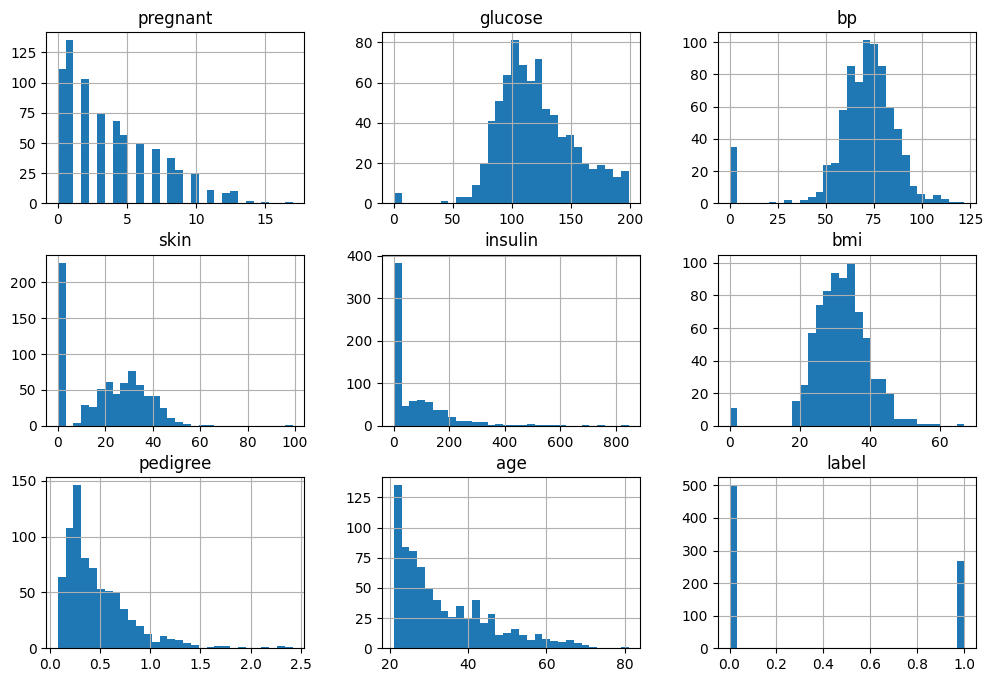

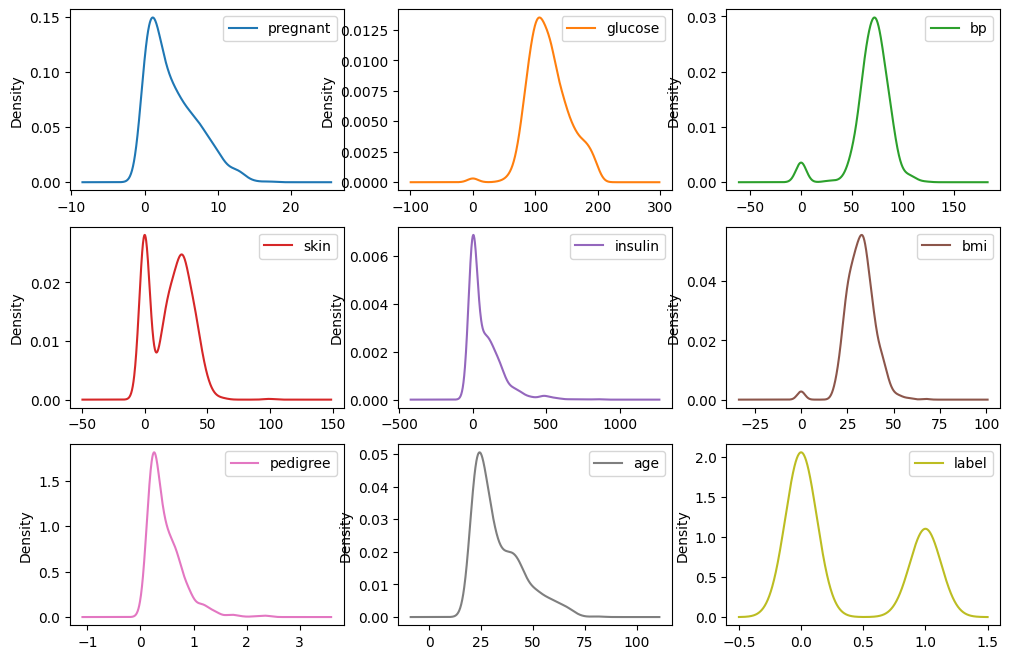

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pima_df.hist(figsize=(12, 8), bins=30)
pima_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
col_features = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
target = 'label'
features = pd.DataFrame(pima_df[col_features], columns=col_features)
target = pima_df[target]
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [11]:
target_train

,label
61,0
619,1
347,0
295,0
232,1
...,...
72,0
107,0
271,1
436,1


In [ ]:
# Try StandardScaler if needed

In [12]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
# The specific integer value doesn't matter, as long as it's the same each time you want the same split.
logreg_model = LogisticRegression(random_state=42)

# fit the model with data
logreg_model.fit(feature_train, target_train)

target_pred = logreg_model.predict(feature_test)
target_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(target_test, target_pred))

# Model Recall: what percentage of positive tuples are correctly built by the model?
print("Recall:", metrics.recall_score(target_test, target_pred))

# Model F1-score: harmonic mean of precision and recall
print("F1-score:", metrics.f1_score(target_test, target_pred))

# Confusion Matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(target_test, target_pred))

Accuracy: 0.7402597402597403
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1-score: 0.6428571428571429
Confusion Matrix:
 [[78 21]
 [19 36]]


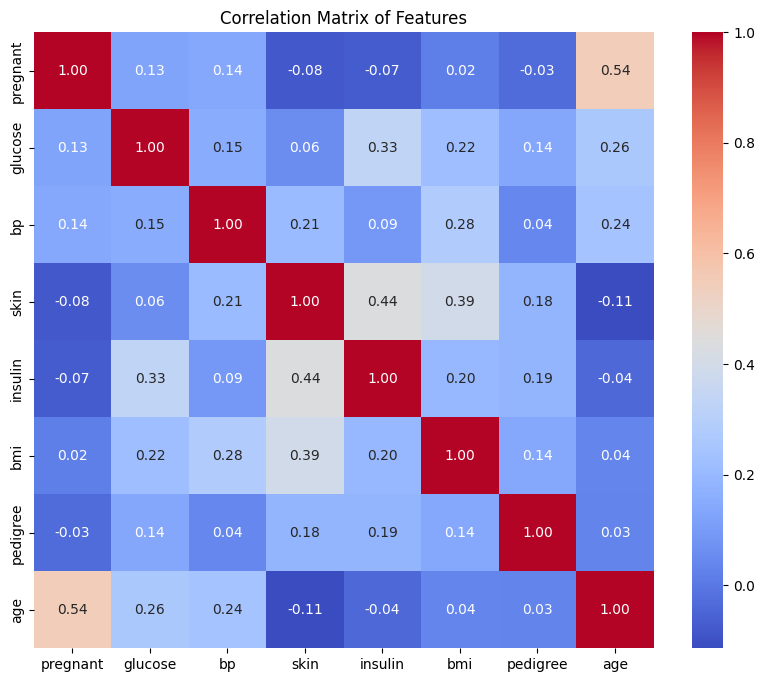

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [19]:
# Identify pairs of features with high collinearity
high_collinearity_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_collinearity_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

if high_collinearity_pairs:
    print("Pairs of features with high collinearity (absolute correlation > 0.7):")
    for feature1, feature2, correlation_value in high_collinearity_pairs:
        print(f"- {feature1} and {feature2}: {correlation_value:.2f}")
else:
    print("No pairs of features with high collinearity (absolute correlation > 0.7) found.")

No pairs of features with high collinearity (absolute correlation > 0.7) found.


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                   for i in range(features.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
    feature        VIF
0  pregnant   3.275748
1   glucose  16.725078
2        bp  14.619512
3      skin   4.008696
4   insulin   2.063689
5       bmi  18.408884
6  pedigree   3.195626
7       age  13.492985


collinearity and correlation should do in step 3: processing data before train model